In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from adjustText import adjust_text
import os

In [2]:
os.chdir("/home/ledum/data/LshCas13a_RNA_cleavage/LshCas13a_C3000")

In [3]:
LRTable = pd.read_csv("Results/Tables/TCS_detection_tables/LRTest_table_and_genome_features.tsv", sep="\t")

ylim=(0, max(-np.log10(LRTable["PValue.adj"].tolist()))*1.05)

In [4]:
LRTable.sort_values(by="PValue.adj", ascending=True, inplace=True)
LRTable

,SeqID,Pos,Strand,logFC,logCPM,LR,PValue,PValue.adj,MatchedFeatureType,MatchedFeatureID,MatchedFeatureGene,MatchedFeatureDescription,MatchedFeatureStart,MatchedFeatureEnd,MatchedFeatureStrand
0,NC_000913.3,4540962,+,10.301635,5.383414,2.248423e+02,7.946885e-51,3.495676e-46,CDS,cds4264,fimB,regulator for fimA,4540957,4541559,+
1,NC_000913.3,2716291,-,-9.658506,5.561311,2.239864e+02,1.221464e-50,3.581983e-46,CDS,cds2594,grcA,stress-induced alternate pyruvate formate-lyas...,2716066,2716449,-
2,NC_000913.3,3088620,+,-7.319793,8.295285,2.153027e+02,9.572842e-49,1.684361e-44,CDS,cds2936,galP,galactose:H(+) symporter,3088284,3089678,+
3,NC_000913.3,2744513,-,7.118205,7.488840,2.136331e+02,2.214424e-48,3.246936e-44,CDS,cds2616,rplS,50S ribosomal subunit protein L19,2744183,2744530,-
4,NC_000913.3,3884341,+,6.811766,7.708720,2.088456e+02,2.453199e-47,2.697782e-43,CDS,cds3686,rpmH,50S ribosomal subunit protein L34,3884336,3884476,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71741,NC_000913.3,3470637,-,0.000085,2.073290,6.467052e-08,9.997971e-01,9.998426e-01,CDS,cds3316,tufA,translation elongation factor Tu 1,3470145,3471329,-
71742,NC_000913.3,1442093,-,-0.000596,0.642863,2.185619e-08,9.998820e-01,9.999103e-01,CDS,cds1391,ldhA,D-lactate dehydrogenase,1441854,1442843,-
71743,NC_000913.3,3473714,-,-0.000289,0.836197,1.986820e-08,9.998875e-01,9.999103e-01,CDS,cds3318,rpsG,30S ribosomal subunit protein S7,3473542,3474081,-
71744,NC_000913.3,1302647,+,-0.000113,2.190869,1.143622e-08,9.999147e-01,9.999260e-01,CDS,cds1241,oppA,oligopeptide ABC transporter periplasmic bindi...,1301182,1302813,+


tRNA
rRNA
CDS


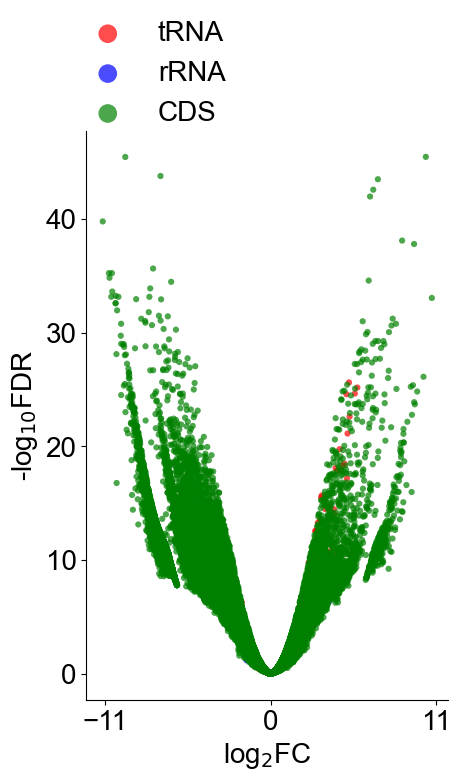

In [13]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 20
figure = plt.figure(figsize=(5,7))
top_N_cutoff = 100

LRT_volcano = figure.add_subplot()

colors_dict = {"tRNA" : "red", "rRNA" : "blue", "CDS" : "green"}
dots_size=20
transparency=0.7

#features_list = set(WT_LRTable["MatchedFeatureType"].tolist()+LRTable["MatchedFeatureType"].tolist())

for feature in colors_dict.keys():
    print(feature)
    current_color = colors_dict[feature]
    
    LRT_volcano.scatter(x=LRTable[LRTable.MatchedFeatureType == feature]["logFC"].tolist(),
                           y=-np.log10(LRTable[LRTable.MatchedFeatureType == feature]["PValue.adj"].tolist()),
                           s=dots_size,
                           label=feature,
                           facecolors='none', 
                           edgecolors='none',
                           alpha=transparency,
                           c = current_color)

# SelectedFeatures = LRTable.query("logFC > 0")[0:20]
# SelectedFeatureLabels = []

# for x, y, t in zip(SelectedFeatures["logFC"], 
#                    -np.log10(SelectedFeatures["PValue.adj"]), 
#                    SelectedFeatures["MatchedFeatureGene"]):
#     SelectedFeatureLabels.append(LRT_volcano.text(x, y, t, size=8))

# adjust_text(SelectedFeatureLabels, force_points=0.1, force_text=0.1,
#             expand_points=(1, 1), expand_text=(1.6, 1.6),
#             arrowprops=dict(arrowstyle="-", color='black', lw=0.5))

LRT_volcano.set_xlabel("log$_2$FC")
LRT_volcano.set_ylabel("-log$_{10}$FDR")
#LRT_volcano.set_title("A", size=15, weight='bold', loc='left')

LRT_volcano.spines['top'].set_visible(False)
LRT_volcano.spines['right'].set_visible(False)

hline_y = -np.log10(LRTable.loc[top_N_cutoff-1]["PValue.adj"])
min_x = -round(max(abs(LRTable["logFC"])))
max_x = round(max(abs(LRTable["logFC"])))

#LRT_volcano.hlines(y = hline_y, xmin=min_x, xmax=max_x, colors="black", linestyles="dashed", lw=1.5)

LRT_volcano.xaxis.set_ticks([min_x, 0, max_x])


handles, labels = LRT_volcano.get_legend_handles_labels()
figure.legend(handles, labels, 
              loc="upper left", bbox_to_anchor=(0.15,1.15), frameon=False, markerscale=3)

figure.tight_layout()
figure.align_labels()

figure.savefig("Results/Pictures/EcC3000_60_min_volcano_plot_without_labels.png", 
               bbox_inches='tight',
               dpi=300)

#TODO: add horizontal line below top-100 points
#TODO: change colors for anticodon-located TCS